In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [53]:
datasets = tf.keras.datasets.fashion_mnist


In [54]:
tf.keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [57]:
(X_train, Y_train), (X_test, Y_test) = datasets.load_data()


In [87]:
type(X_train)

numpy.ndarray

In [58]:
X_train.shape

(60000, 28, 28)

In [59]:
inputs = keras.Input(shape=(784,), name="digits")
x1 = layers.Dense(64, activation="relu")(inputs)
x2 = layers.Dense(64, activation="relu")(x1)
outputs = layers.Dense(10, name="predictions")(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

In [95]:
# Instantiate an optimizer.
#khởi tạo tối ưu bằng SGD
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
#khởi tạo loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
#data training
#số lượng data train trong 1 batch là 64
batch_size = 64

X_train = np.reshape(X_train, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

In [83]:
X_train.shape

(1680000, 28)

In [96]:
#epochs = 5, số lần đưa tất cả dữ liệu vào
#chạy 5 lần dữ liệu
epochs = 5
#vòng lặp từ epoch từ 1 đến 5
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    #vòng lặp số lần trong 1 batch trong data
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        #open gradient lưu lại tham số trong mỗi lần chạy
        # during the forward pass, which enables auto-differentiation.
        #trong quá trình forword, sẽ tự lưu 
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer
            # chạy lớp chuyển tiếp của mỗi layer.
            # The operations that the layer applies
            #ứng dụng layer
            # to its inputs are going to be recorded
            #input được lưu lại
            # on the GradientTape.
            
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            #tính toán giá trị hàm loss
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # sử dụng gradient để tự động truy xuất
        # the gradients of the trainable variables with respect to the loss
        # giá trị gradients của các biến có tính toán giá trị hàm loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        #mỗi lần chạy gradient sẽ được update giá trị
        # the value of the variables to minimize the loss.
        #giá trị của biến giảm theo hàm loss
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        #với 200 batch thì tính toán training loss
        if step % 50 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * 60))


Start of epoch 0
Training loss (for one batch) at step 0: 0.5650
Seen so far: 60 samples
Training loss (for one batch) at step 50: 0.6598
Seen so far: 3060 samples
Training loss (for one batch) at step 100: 0.5128
Seen so far: 6060 samples
Training loss (for one batch) at step 150: 0.3214
Seen so far: 9060 samples
Training loss (for one batch) at step 200: 0.4497
Seen so far: 12060 samples
Training loss (for one batch) at step 250: 0.5973
Seen so far: 15060 samples
Training loss (for one batch) at step 300: 0.4785
Seen so far: 18060 samples
Training loss (for one batch) at step 350: 0.4005
Seen so far: 21060 samples
Training loss (for one batch) at step 400: 0.4106
Seen so far: 24060 samples
Training loss (for one batch) at step 450: 0.4739
Seen so far: 27060 samples
Training loss (for one batch) at step 500: 0.3722
Seen so far: 30060 samples
Training loss (for one batch) at step 550: 0.5283
Seen so far: 33060 samples
Training loss (for one batch) at step 600: 0.3246
Seen so far: 3606

In [69]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [73]:
predictions = probability_model.predict(X_test)

In [74]:
X_test[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,  67,   0,
         0,   0,   0,  50,  38,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 120, 209, 226,
       247, 237, 255, 255, 255, 247, 238, 235, 172,  72,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 137, 239, 252,
       243, 234, 229, 238, 244, 246, 240, 230, 232, 239, 248, 251, 194,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 102, 255,
       231, 228, 227, 228, 233, 230, 230, 229, 228, 232, 232, 231, 227,
       224, 252, 179,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       233, 241, 229, 231, 255, 255, 238, 231, 227, 238, 246, 228, 230,
       227, 234, 235, 229, 241,  20,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 248, 241, 231, 255, 149,  47, 252, 228, 255, 242, 216,
       238, 232, 255, 228, 220, 234, 250,  54,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 255, 240, 232, 255,  15,   0, 255, 23

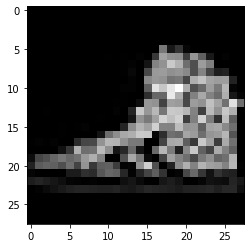

In [77]:
plt.imshow(X_test[6666].reshape(28, 28), cmap='gray')
plt.show()

In [79]:
predictions = probability_model.predict(X_test)